In [13]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
# import classy module
%autoreload 2
from classy import Class

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [28]:
# create instance of the class "Class"
from classy import Class

hyrecLCDM = Class()

hyrecLCDM.set({
    'recombination': 'hyrec',
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes','P_k_max_1/Mpc':3.0
})

hyrecLCDM.compute()

hyrec_new = Class()

hyrec_new.set({
    'recombination': 'hyrec',
    'Alpha_inf hyrec file': '../hyrec/data/Alpha_Ar_400_beta_-2.6_n_250.dat',
    'Beta_inf hyrec file':  '../hyrec/data/Beta_Ar_400_beta_-2.6_n_250.dat',
    'R_2pto2s hyrec file':  '../hyrec/data/RR_2pto2s_Ar_400_beta_-2.6_n_250.dat',
    'R_2sto2p hyrec file':  '../hyrec/data/'
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes','P_k_max_1/Mpc':3.0
})

recfastLCDM = Class()
# pass input parameters

recfastLCDM.set({
    'recombination': 'recfast',
#     'recombination': 'hyrec',
#     'Alpha_inf hyrec file': '../hyrec/Alpha_BB_n_250_fine.dat',
    'output':'tCl,pCl,lCl,mPk',
    'lensing':'yes','P_k_max_1/Mpc':3.0
})


# run class

recfastLCDM.compute()

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


Text(0, 0.5, '$(C_\\ell - C_\\ell^\\mathrm{ref})/C_\\ell^\\mathrm{ref} [\\%]$')

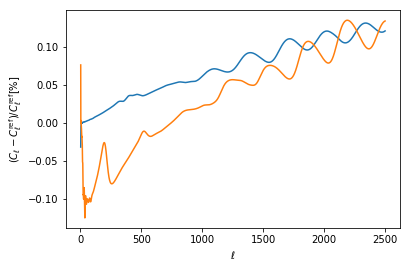

In [30]:
cls_hyrec   = hyrecLCDM.lensed_cl(2500)
cls_recfast = recfastLCDM.lensed_cl(2500)

ll_vec_hyrec   = cls_hyrec['ell']
ll_vec_recfast = cls_recfast['ell']

plt.figure()

ax = plt.gca()

# ax.set_yscale('log')

plt.plot(ll_vec_hyrec,   (cls_hyrec['tt']/cls_recfast['tt'] - 1.)*100)
plt.plot(ll_vec_recfast, (cls_hyrec['ee']/cls_recfast['ee'] - 1.)*100)


plt.xlabel(r'$\ell$')
plt.ylabel(r'$(C_\ell - C_\ell^\mathrm{ref})/C_\ell^\mathrm{ref} [\%]$')

In [19]:
z_xe_new = np.loadtxt('/Users/hongwan/Github/class/hyrec/LambdaCDM_new_z_xe.dat')
z_xe_old = np.loadtxt('/Users/hongwan/desktop/LambdaCDM_z_xe.dat')

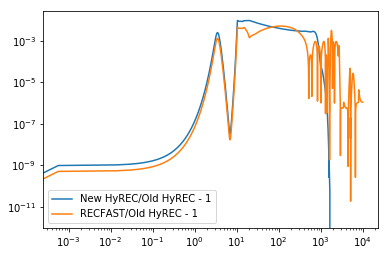

In [51]:
plt.figure()

plt.loglog()

plt_frac_diff_new, = plt.plot(z_xe_old[:,0], np.abs((z_xe_new[:,1] - z_xe_old[:,1])/z_xe_old[:,1]), label='New HyREC/Old HyREC - 1')
plt_frac_diff_recfast, = plt.plot(z_xe_old[:,0], np.abs((recfastLCDM.get_thermodynamics()['x_e'] - z_xe_old[:,1])/z_xe_old[:,1]), label='RECFAST/Old HyREC - 1')

plt.legend()

In [33]:
l_Cltt_Clee_old = np.loadtxt('/Users/hongwan/desktop/LambdaCDM_l_Cltt_Clee.dat')

/Users/hongwan/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


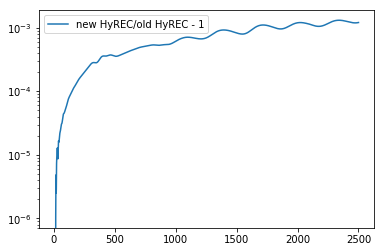

In [52]:
plt.figure()

ax = plt.gca()
ax.set_yscale('log')

# plt.axis([1, 2500, 1e-20, 1e-11])

ratio = cls_hyrec['tt']/l_Cltt_Clee_old[:,1]

plt_Cls_compare, = plt.plot(ll_vec_hyrec, ratio-1, label='new HyREC/old HyREC - 1')
plt.legend()
# plt.plot(l_Cltt_Clee_old[:,0], l_Cltt_Clee_old[:,0]*(l_Cltt_Clee_old[:,0]+1)*l_Cltt_Clee_old[:,1])
# plt.plot(ll_vec_hyrec,  ll_vec_hyrec*(ll_vec_hyrec + 1)*cls_hyrec['tt'])